# Imports

In [1]:
import torch
import torch.optim as optim         
import matplotlib.pyplot as plt
import numpy as np
import os
from anti_derivative import *

Using cpu device


In [2]:
DATA_DIR = 'data'
SAVE_DIR = 'images'
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

All the functions and objects are in the file `anti_derivative.py`.

# Loading Data And Creating Model

In [3]:
train_data_dir = os.path.join(DATA_DIR, 'antiderivative_aligned_train.npz')

branch_layers = [100, 50, 50, 50, 50, 50]
trunk_layers =  [1, 50, 50, 50, 50, 50]
model = DeepONet(branch_layers=branch_layers, trunk_layers=trunk_layers)
model.summary()

DeepONet(
  (branch): Sequential(
    (linear0): Linear(in_features=100, out_features=50, bias=True)
    (relu0): ReLU()
    (linear1): Linear(in_features=50, out_features=50, bias=True)
    (relu1): ReLU()
    (linear2): Linear(in_features=50, out_features=50, bias=True)
    (relu2): ReLU()
    (linear3): Linear(in_features=50, out_features=50, bias=True)
    (relu3): ReLU()
    (linear4): Linear(in_features=50, out_features=50, bias=True)
    (relu4): ReLU()
  )
  (trunk): Sequential(
    (linear0): Linear(in_features=1, out_features=50, bias=True)
    (relu0): ReLU()
    (linear1): Linear(in_features=50, out_features=50, bias=True)
    (relu1): ReLU()
    (linear2): Linear(in_features=50, out_features=50, bias=True)
    (relu2): ReLU()
    (linear3): Linear(in_features=50, out_features=50, bias=True)
    (relu3): ReLU()
    (linear4): Linear(in_features=50, out_features=50, bias=True)
    (relu4): ReLU()
  )
)


# Training and Evaluation

In [4]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
deeponet_train = TrainDeepONet(model=model)
losses = deeponet_train.train(train_data_path=train_data_dir, optimizer=optimizer, epochs=200, batch_size=128)

Epoch:   0, Loss: 0.117176
Epoch:  20, Loss: 0.003596
Epoch:  40, Loss: 0.000943
Epoch:  60, Loss: 0.000464
Epoch:  80, Loss: 0.000252
Epoch: 100, Loss: 0.000142
Epoch: 120, Loss: 0.000096
Epoch: 140, Loss: 0.000094
Epoch: 160, Loss: 0.000065
Epoch: 180, Loss: 0.000066


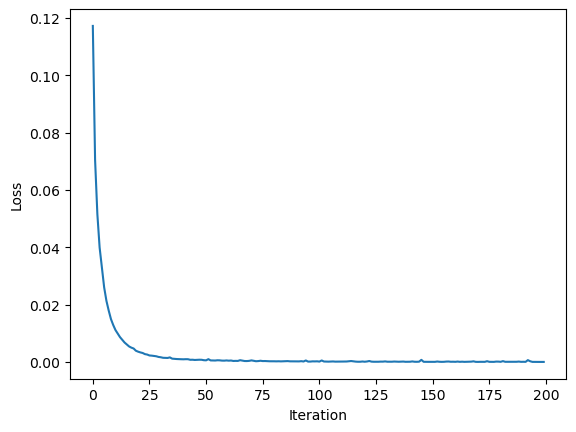

In [6]:
plt.figure()
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.savefig(os.path.join(SAVE_DIR, "0101.png"))

In [7]:
test_data_dir = os.path.join(DATA_DIR, 'antiderivative_aligned_test.npz')
u_test, y_test, s_test = deeponet_train.load_dataset(test_data_dir)
u_test, y_test, s_test = deeponet_train.create_dataset(u_test, y_test, s_test)

In [8]:
y_test_t = torch.tensor(y_test, dtype=torch.float32)
u_test_t = torch.tensor(u_test, dtype=torch.float32)

In [9]:
#Model Predictions 
s_pred = model.predict(u_test_t, y_test_t)

Let's calculate the mean absolute error on the test data.

In [10]:
mae = np.mean(np.abs(s_pred - s_test))
print("MAE: {0:.6f}".format(mae))

MAE: 0.013539
